<a id='top'></a>

# Structural reliability analysis

In this notebook we will explore the intricacies of performing structural reliability analysis.

## Table of contents

[Preamble](#Preamble)

[Poisson distributions](#Poisson-distributions)

[Conclusions](#Conclusions)

[References](#References)

[Odds and ends](#Odds-and-ends)

## Computational lab setup

In [1]:
% matplotlib inline

import sys

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl

from scipy.stats import norm, lognorm
from scipy.integrate import quad
import matplotlib.pyplot as plt

print(sys.version)
for module in (np, sp, pd, mpl):
    print('{:.<15}{}'.format(module.__name__, module.__version__))

3.5.2 |Anaconda 4.3.0 (32-bit)| (default, Jul  2 2016, 17:49:02) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
numpy..........1.11.3
scipy..........0.18.1
pandas.........0.19.2
matplotlib.....2.0.0


[Back to top](#top)

## Basic reliability problem

Describe problem here!

## Failure probability computation

$$PF = \int_{-\infty}^{+\infty}\phi_{demand}(x)\cdot\Phi_{capacity}(x)\;dx = \int_{-\infty}^{+\infty}\left[1-\Phi_{demand}(x)\right]\cdot\phi_{capacity}(x)\;dx$$

[Back to top](#top)

## First example: normally distributed random variables

Consider a very simple case where both capacity and demand (measured in terms of action-effects) are represented by independent random variables with a normal distribution.

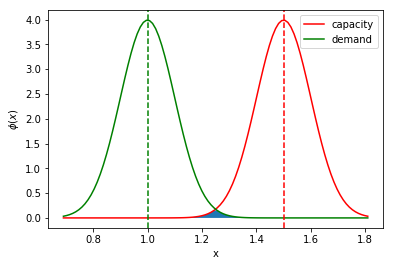

In [2]:
capacity = norm(loc=1.5, scale=0.1) # capacity
demand = norm(loc=1.0, scale=0.1) # demand
x = np.linspace(demand.ppf(0.001), capacity.ppf(0.999), 100)

fig, ax = plt.subplots()
ax.plot(x, capacity.pdf(x), label='capacity', color='r')
ax.plot(x, demand.pdf(x), label='demand', color='g')
ax.axvline(capacity.stats(moments='m'), linestyle='--', color='r')
ax.axvline(demand.stats(moments='m'), linestyle='--', color='g')
ax.fill_between(x, 0., np.minimum(capacity.pdf(x),demand.pdf(x)))
ax.set_xlabel('x')
ax.set_ylabel('$\phi(x)$')
ax.legend()

First numerical solution:

$$PF = \int_{-\infty}^{+\infty}\phi_{demand}(x)\cdot\Phi_{capacity}(x)\;dx$$

In [3]:
def f1(x):
    """Objective function for numerical quadrature."""
    return demand.pdf(x)*capacity.cdf(x)

val, err = quad(f1, demand.ppf(0.001), capacity.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

Value = 2.034760e-04, error = 1.759145e-09


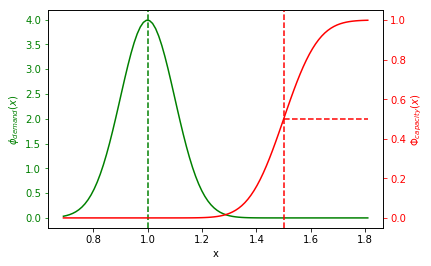

In [4]:
fig, ax = plt.subplots()
ax1 = ax.twinx() # secondary axis for capacity
ax.plot(x, demand.pdf(x), label='$\phi_{demand}(x)$', color='g')
ax1.plot(x, capacity.cdf(x), label='$\Phi_{capacity}(x)$', color='r')
ax.axvline(demand.stats(moments='m'), linestyle='--', color='g')
ax1.axvline(capacity.stats(moments='m'), linestyle='--', color='r')
ax1.plot((capacity.stats(moments='m'),x[-1]),(0.5, 0.5), linestyle='--', color='r')
ax.set_xlabel('x')
ax.set_ylabel('$\phi_{demand}(x)$', color='g')
ax.tick_params('y', colors='g')
ax1.set_ylabel('$\Phi_{capacity}(x)$', color='r')
ax1.tick_params('y', colors='r')

Second numerical solution:

$$PF = \int_{-\infty}^{+\infty}\left[1-\Phi_{demand}(x)\right]\cdot\phi_{capacity}(x)\;dx$$

In [5]:
def f2(x):
    """Objective function for numerical quadrature."""
    return (1.-demand.cdf(x))*capacity.pdf(x)

val, err = quad(f2, demand.ppf(0.001), capacity.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

Value = 2.034760e-04, error = 1.759145e-09


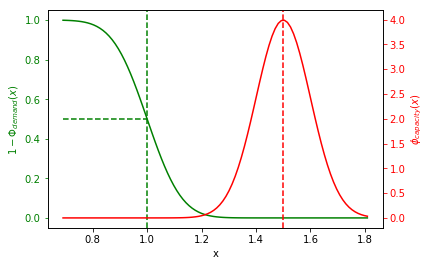

In [6]:
fig, ax = plt.subplots()
ax1 = ax.twinx() # secondary axis for capacity
ax.plot(x, 1.-demand.cdf(x), label='$1-\Phi_{demand}(x)$', color='g')
ax1.plot(x, capacity.pdf(x), label='$\phi_{capacity}(x)$', color='r')
ax.axvline(demand.stats(moments='m'), linestyle='--', color='g')
ax1.axvline(capacity.stats(moments='m'), linestyle='--', color='r')
ax.plot((x[0], demand.stats(moments='m')),(0.5, 0.5), linestyle='--', color='g')
ax.set_xlabel('x')
ax.set_ylabel('$1-\Phi_{demand}(x)$', color='g')
ax.tick_params('y', colors='g')
ax1.set_ylabel('$\phi_{capacity}(x)$',color='r')
ax1.tick_params('y', colors='r')

For this first case there is a closed form solution for the failure probability ($PF$):

$$PF = \Phi(\frac{0-\mu}{\sigma}) = \Phi(-\beta)$$

where $\beta=\frac{\mu}{\sigma}$ is called the safety index.

See pages 47-48 of:
http://www.km.fgg.uni-lj.si/coste24/data/coimbradocuments/coimbra-faber.pdf

In [7]:
miu = capacity.mean()-demand.mean()
sigma = np.sqrt(capacity.std()**2+demand.std()**2)
print('miu = {:1.6e}, sigma = {:1.6e}'.format(miu, sigma))
beta = miu/sigma
print('beta = {:1.6}'.format(beta))
PF = norm.cdf(-beta) # probability of failure
print('Value = {:1.6e}'.format(PF))

miu = 5.000000e-01, sigma = 1.414214e-01
beta = 3.53553
Value = 2.034760e-04


## Second example: lognormally distributed random variables

Now consider a similar problem but with lorgnormally distributed random variables:

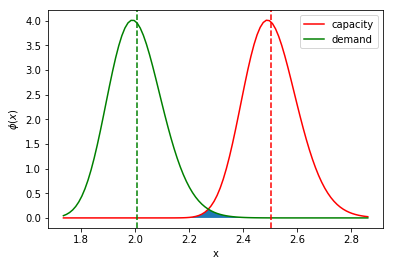

In [8]:
capacity2 = lognorm(loc=1.5, s=0.1) # capacity
demand2 = lognorm(loc=1.0, s=0.1) # demand
x = np.linspace(demand2.ppf(0.001), capacity2.ppf(0.999), 100)

fig, ax = plt.subplots()
ax.plot(x, capacity2.pdf(x), label='capacity', color='r')
ax.plot(x, demand2.pdf(x), label='demand', color='g')
ax.axvline(capacity2.stats(moments='m'), linestyle='--', color='r')
ax.axvline(demand2.stats(moments='m'), linestyle='--', color='g')
ax.fill_between(x, 0., np.minimum(capacity2.pdf(x),demand2.pdf(x)))
ax.set_xlabel('x')
ax.set_ylabel('$\phi(x)$')
ax.legend()

First numerical solution:

$$PF = \int_{-\infty}^{+\infty}\phi_{demand}(x)\cdot\Phi_{capacity}(x)\;dx$$

In [9]:
def f1(x):
    """Objective function for numerical quadrature."""
    return demand2.pdf(x)*capacity2.cdf(x)

val, err = quad(f1, demand2.ppf(0.001), capacity2.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

Value = 3.214780e-04, error = 2.015274e-09


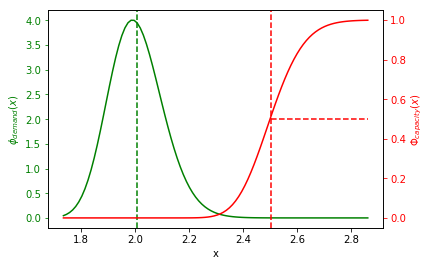

In [10]:
fig, ax = plt.subplots()
ax1 = ax.twinx() # secondary axis for capacity
ax.plot(x, demand2.pdf(x), label='$\phi_{demand}(x)$', color='g')
ax1.plot(x, capacity2.cdf(x), label='$\Phi_{capacity}(x)$', color='r')
ax.axvline(demand2.stats(moments='m'), linestyle='--', color='g')
ax1.axvline(capacity2.stats(moments='m'), linestyle='--', color='r')
ax1.plot((capacity2.stats(moments='m'),x[-1]),(0.5, 0.5), linestyle='--', color='r')
ax.set_xlabel('x')
ax.set_ylabel('$\phi_{demand}(x)$', color='g')
ax.tick_params('y', colors='g')
ax1.set_ylabel('$\Phi_{capacity}(x)$', color='r')
ax1.tick_params('y', colors='r')

Second numerical solution:

$$PF = \int_{-\infty}^{+\infty}\left[1-\Phi_{demand}(x)\right]\cdot\phi_{capacity}(x)\;dx$$

In [11]:
def f2(x):
    """Objective function for numerical quadrature."""
    return (1.-demand2.cdf(x))*capacity2.pdf(x)

val, err = quad(f2, demand2.ppf(0.001), capacity2.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

Value = 3.214783e-04, error = 1.204997e-09


For this second case there is also a closed form solution for the failure probability ($PF$):

$$PF = \Phi(\frac{0-log\left(\frac{\mu_C}{\mu_D}\sqrt{\frac{1+COV_D^2}{1+COV_C^2}}\right)}{\sqrt{log\left[\left(1+COV_D^2\right)\left(1+COV_C^2\right)\right]}}) = \Phi(-\beta)$$

where $COV=\frac{\sigma}{\mu}$ is the covariance and $\beta=\frac{\mu}{\sigma}$ is called the safety index.

See pages 47-48 of:
http://www.km.fgg.uni-lj.si/coste24/data/coimbradocuments/coimbra-faber.pdf

In [12]:
cov_C = capacity2.std()/capacity2.mean()
cov_D = demand2.std()/demand2.mean()
miu = np.log(capacity2.mean()/demand2.mean()*np.sqrt((1+cov_D**2)/(1+cov_C**2)))
sigma = np.sqrt(np.log((1+cov_D**2)*(1+cov_C**2)))
print('miu = {:1.6e}, sigma = {:1.6e}'.format(miu, sigma))
beta = miu/sigma
print('beta = {:1.6}'.format(beta))
PF = norm.cdf(-beta) # probability of failure
print('Value = {:1.6e}'.format(PF))

miu = 2.230962e-01, sigma = 6.432981e-02
beta = 3.46801
Value = 2.621673e-04


## Reliability index

To be done!

Example from:

http://www.springer.com/cda/content/document/cda_downloaddocument/9783319209456-c2.pdf%3FSGWID%3D0-0-45-1544683-p177543534&usd=2&usg=AFQjCNFO1huDK6zcCJeCqWsgSdD6EqkSMg

Value = 2.454115e-01, error = 5.023654e-10


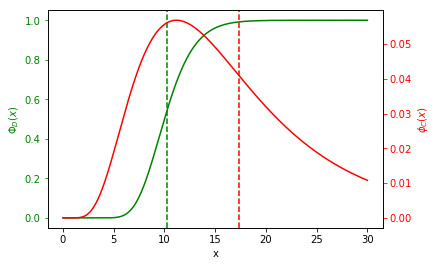

In [13]:
mu_C = 15
COV_C = 0.2
C = lognorm(COV_C * np.log(mu_C), scale=(mu_C)) # capacity

mu_D = 10
COV_D = 0.1
D = lognorm(COV_D * np.log(mu_D), scale=(mu_D)) # demand

#x = np.linspace(D.ppf(0.1), C.ppf(0.9), 100)
x = np.linspace(0.01, 30, 1000)

fig, ax = plt.subplots()
ax1 = ax.twinx() # secondary axis for capacity
ax.plot(x, D.cdf(x), label='$\Phi_{D}(x)$', color='g')
ax1.plot(x, C.pdf(x), label='$\phi_{C}(x)$', color='r')
ax.axvline(D.stats(moments='m'), linestyle='--', color='g')
ax1.axvline(C.stats(moments='m'), linestyle='--', color='r')
#ax1.plot((C.stats(moments='m'),x[-1]),(0.5, 0.5), linestyle='--', color='r')
ax.set_xlabel('x')
ax.set_ylabel('$\Phi_{D}(x)$', color='g')
ax.tick_params('y', colors='g')
ax1.set_ylabel('$\phi_{C}(x)$', color='r')
ax1.tick_params('y', colors='r')

def f1(x):
    """Objective function for numerical quadrature."""
    return D.pdf(x)*C.cdf(x)

val, err = quad(f1, D.ppf(0.001), C.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

[Back to top](#top)

## References

Notebook inspired by

http://www.math.chalmers.se/Stat/Grundutb/CTH/mve300/1112/files/Lecture10/Lecture10.pdf

Safety indexes:

> Cornell safety index

> Hasofer-Lind index

Concepts and examples

https://www.palisade.com/downloads/pdf/EngineeringReliabilityConcepts.pdf

Other references

http://www.eurocodes.fi/1990/paasivu1990/sahkoinen1990/handbook2%5B1%5D.pdf

http://www.springer.com/cda/content/document/cda_downloaddocument/9783319209456-c2.pdf%3FSGWID%3D0-0-45-1544683-p177543534&usd=2&usg=AFQjCNFO1huDK6zcCJeCqWsgSdD6EqkSMg

Main references

http://www.km.fgg.uni-lj.si/coste24/data/coimbradocuments/coimbra-faber.pdf

http://www.kstr.lth.se/fileadmin/kstr/pdf_files/STforsk_kurs-10/presentatione_rmm/reliability_analysis10__Kompatibilitetslaege_.pdf

http://web.mae.ufl.edu/nkim/eas6939/RBDO_Class.pdf

http://civile.utcb.ro/ccba/srracourse.pdf

[Back to top](#top)

## Odds and ends

This notebook was created by Paulo Xavier Candeias.

[Back to top](#top)